# Imports

In [47]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from pathlib import Path

from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale

# Basics of PyTorch
- Very similar to NumPy, but more custom-built for use in deep learning and includes easy use of GPU's as well as an enginge for automatically computing derivatives
- 'Arrays' are now called 'Tensors'... very cool

## Creating and Manipulating Tensors

In [2]:
# tensor from a list
a = torch.tensor([0, 1, 2])

# tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [3]:
# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

# there are also constructors that allow us to construct
# a tensor according to the above constructors, but with
# dimensions equal to another tensor

c = torch.zeros_like(a)
d = torch.rand_like(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor a: tensor([[0.6462, 0.5635, 0.3833]])
Tensor b: tensor([[ 0.4551,  0.4315, -0.8834,  0.9698],
        [ 2.4535,  0.2601,  0.9483,  0.9577],
        [ 0.8117, -0.6477,  0.4232,  0.0993]])
Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.5772, 0.8250, 0.3158]])


In [4]:
# setting random seed for all devices (both CPU and CUDA)
torch.manual_seed(0)

In [5]:
# torch contains functions for generating tensors in a very similar manner to NumPy
a = torch.arange(0, 10, step=1)
b = np.arange(0, 10, step=1)

c = torch.linspace(0, 5, steps=11)
d = np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Numpy array b: {b}\n")
print(f"Tensor c: {c}\n")
print(f"Numpy array d: {d}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy array b: [0 1 2 3 4 5 6 7 8 9]

Tensor c: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])

Numpy array d: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]



## Operations

In [7]:
# tensor-tensor operations
a = torch.ones(5, 3)
b = torch.rand(5, 3)
c = torch.empty(5, 3)
d = torch.empty(5, 3)

# this only works if c and d already exist
torch.add(a, b, out=c)
# Pointwise Multiplication of a and b
torch.multiply(a, b, out=d)
print(c)
print(d)

tensor([[1.4963, 1.7682, 1.0885],
        [1.1320, 1.3074, 1.6341],
        [1.4901, 1.8964, 1.4556],
        [1.6323, 1.3489, 1.4017],
        [1.0223, 1.1689, 1.2939]])
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939]])


In [8]:
# tensor methods are also the same as in NumPy
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")
print("\n")

print(f"Mean value of all elements of x {x.mean()}")
print(f"Mean values of the columns of x {x.mean(axis=0)}")
print(f"Mean values of the rows of x {x.mean(axis=1)}")

tensor([[0.5185, 0.6977, 0.8000],
        [0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742]])


Sum of every element of x: 5.327557563781738
Sum of the columns of x: tensor([1.5947, 1.3770, 2.3558])
Sum of the rows of x: tensor([2.0162, 1.1249, 2.1864])


Mean value of all elements of x 0.5919508337974548
Mean values of the columns of x tensor([0.5316, 0.4590, 0.7853])
Mean values of the rows of x tensor([0.6721, 0.3750, 0.7288])


### Matrix Operations

In [11]:
# '@' operator and torch.matmul() do matrix multiplication
a = torch.tensor([[2,4],[5,7]])
b = torch.tensor([[1,1],[2,3]])
c = a@b
d = torch.matmul(a,b)
print(c)
print(d)

tensor([[10, 14],
        [19, 26]])
tensor([[10, 14],
        [19, 26]])


In [12]:
# dot product
a = torch.tensor([3,5,7])
b = torch.tensor([2,4,6])
c = torch.dot(a,b)
print(c)

tensor(68)


## Manipulating Tensors
- indexing, reshaping, and concatenation work similar to NumPy as well

In [15]:
# indexing
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3])
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


In [16]:
# reshaping
z = torch.arange(12).reshape(6, 2)
print(f"Original z: \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}")

Original z: 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [17]:
# concatenation
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

# by rows
cat_rows = torch.cat((x, y), dim=0)

# by columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


# Datasets and Dataloaders
- PyTorch comes pre-packaged with a number of common datasets, which can come in handy when testing out new models

## Datasets

In [22]:
# Download and load the images from the CIFAR10 dataset
cifar10_data = datasets.CIFAR10(
    root="data",            # path where the images will be stored
    download=True,          # all images should be downloaded
    transform=ToTensor()    # transform the images to tensors
)

# Print the number of samples in the loaded dataset
print(f"Number of samples: {len(cifar10_data)}")
print(f"Class names: {cifar10_data.classes}")

Files already downloaded and verified
Number of samples: 50000
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [23]:
# Choose a random sample
random.seed(2021)
image, label = cifar10_data[random.randint(0, len(cifar10_data))]
print(f"Label: {cifar10_data.classes[label]}")
print(f"Image size: {image.shape}")

Label: horse
Image size: torch.Size([3, 32, 32])


In [31]:
# remember to permute so that RGB is last dimension
perm_image = image.permute(1,2,0)
perm_image.shape

torch.Size([32, 32, 3])

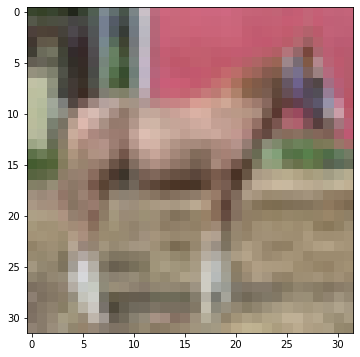

In [32]:
# show image
plt.figure(figsize=(9,6))
plt.imshow(perm_image)
plt.show()

In [33]:
# You can specify if you want to load the training and testing data separately
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


## Dataloaders

In [34]:
# Create dataloaders with
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Batch size: torch.Size([64, 3, 32, 32])


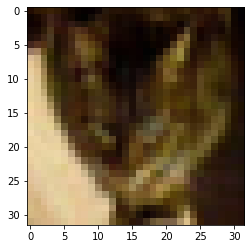

In [35]:
# Load the next batch
batch_images, batch_labels = next(iter(train_dataloader))
print('Batch size:', batch_images.shape)

# Display the first image from the batch
plt.imshow(batch_images[0].permute(1, 2, 0))
plt.show()

# Neural Networks

In [37]:
# Create a dataset of 256 points with a little noise
X, y = make_moons(256, noise=0.1)

# Store the data as a Pandas data frame and save it to a CSV file
df = pd.DataFrame(dict(x0=X[:,0], x1=X[:,1], y=y))
df.to_csv('sample_data.csv')

Size X:(256, 2)
Size y:(256,)


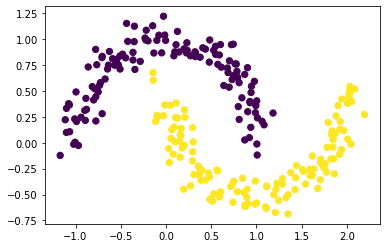

In [38]:
# Load the data from the CSV file in a Pandas DataFrame
data = pd.read_csv("sample_data.csv")

# Create a 2D numpy array from the x0 and x1 columns
X_orig = data[["x0", "x1"]].to_numpy()

# Create a 1D numpy array from the y column
y_orig = data["y"].to_numpy()

# Print the sizes of the generated 2D points X and the corresponding labels Y
print(f"Size X:{X_orig.shape}")
print(f"Size y:{y_orig.shape}")

# Visualize the dataset. The color of the points is determined by the labels `y_orig`.
plt.scatter(X_orig[:, 0], X_orig[:, 1], s=40, c=y_orig)
plt.show()

In [42]:
# Initialize the device variable
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Convert the 2D points to a float32 tensor
X = torch.tensor(X_orig, dtype=torch.float32)

# Upload the tensor to the device
X = X.to(DEVICE)

print(f"Size X:{X.shape}")

# Convert the labels to a long interger tensor
y = torch.from_numpy(y_orig).type(torch.LongTensor)
# Upload the tensor to the device
y = y.to(DEVICE)

print(f"Size y:{y.shape}")

Size X:torch.Size([256, 2])
Size y:torch.Size([256])


In [53]:
# Inherit from nn.Module - the base class for neural network modules provided by Pytorch
class NaiveNet(nn.Module):

    # Define the structure of your network
    def __init__(self):
        super(NaiveNet, self).__init__()

        # The network is defined as a sequence of operations
        self.layers = nn.Sequential(
            nn.Linear(2, 16),  # Transformation from the input to the hidden layer
            nn.ReLU(),         # Activation function (ReLU) is a non-linearity which is widely used because it reduces computation. The function returns 0 if it receives any
                               # negative input, but for any positive value x, it returns that value back.
            nn.Linear(16, 2),  # Transformation from the hidden to the output layer
        )

    # Specify the computations performed on the data
    def forward(self, x):
        # Pass the data through the layers
        return self.layers(x)

    # Choose the most likely label predicted by the network
    def predict(self, x):
        # Pass the data through the networks
        output = self.forward(x)
        # Choose the label with the highest score
        return torch.argmax(output, 1)

    # Implement the train function given a training dataset X and corresponding labels y
    def train(self, X, y):
        # The Cross Entropy Loss is suitable for classification problems
        loss_function = nn.CrossEntropyLoss()

        # Create an optimizer (Stochastic Gradient Descent) that will be used to train the network
        learning_rate = 1e-2
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        # Number of epochs
        epochs = 15000

        # List of losses for visualization
        losses = []

        for i in range(epochs):
            # Pass the data through the network and compute the loss
            # We'll use the whole dataset during the training instead of using batches
            # in to order to keep the code simple for now.
            y_logits = model.forward(X)
            loss = loss_function(y_logits, y)

            # Clear the previous gradients and compute the new ones
            optimizer.zero_grad()
            loss.backward()

            # Adapt the weights of the network
            optimizer.step()

            # Store the loss
            losses.append(loss.item())

            # Print the results at every 1000th epoch
            if i % 1000 == 0:
                print(f"Epoch {i} loss is {loss.item()}")

                plot_decision_boundary(model, X, y, DEVICE)
                plt.savefig('frames/{:05d}.png'.format(i))

        return losses

In [44]:
# Create new NaiveNet and transfer it to the device
model = NaiveNet().to(DEVICE)

# Print the structure of the network
print(model)

NaiveNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [54]:
# helper function to plot the decision boundary
def plot_decision_boundary(model, X, y, device):
    # Transfer the data to the CPU
    X = X.cpu().numpy()
    y = y.cpu().numpy()

    # Check if the frames folder exists and create it if needed
    frames_path = Path("frames")
    if not frames_path.exists():
        frames_path.mkdir()

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points = torch.from_numpy(grid_points).type(torch.FloatTensor)
    Z = model.predict(grid_points.to(device)).cpu().numpy()
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

Epoch 0 loss is 0.7145092487335205
Epoch 1000 loss is 0.25971734523773193
Epoch 2000 loss is 0.2326008677482605
Epoch 3000 loss is 0.22186516225337982
Epoch 4000 loss is 0.21114741265773773
Epoch 5000 loss is 0.19897589087486267
Epoch 6000 loss is 0.18515929579734802
Epoch 7000 loss is 0.16984832286834717
Epoch 8000 loss is 0.15326645970344543
Epoch 9000 loss is 0.13617847859859467
Epoch 10000 loss is 0.11937729269266129
Epoch 11000 loss is 0.10384736955165863
Epoch 12000 loss is 0.09016038477420807
Epoch 13000 loss is 0.07839932292699814
Epoch 14000 loss is 0.06845318526029587


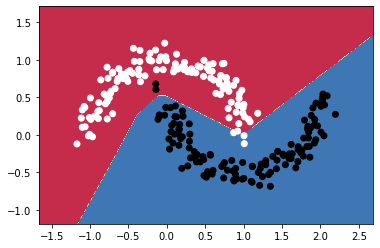

In [55]:
# Create a new network instance a train it
model = NaiveNet().to(DEVICE)
losses = model.train(X, y)

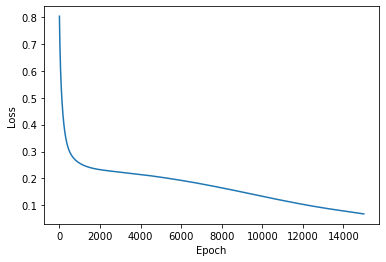

In [52]:
# plot the loss during training
plt.plot(np.linspace(1, len(losses), len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()